In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
def founderShareValue(pShare, dLockup, pSuccess, dDilution):
    return pShare * (1 - dLockup) * pSuccess * (1 - dDilution)

In [3]:
pShare = 10.0
dLockup = np.random.uniform(0.250, 0.275)
pSuccess = np.random.uniform(0.75, 0.80)
dDilution = np.random.uniform(0.00, 0.10)

print("Example (I assume that corresponding parameters are uniformly distributed):\n")
print(f"P_share: {pShare}")
print(f"D_lockup: {dLockup:.6f}")
print(f"P_success: {pSuccess:.6f}")
print(f"D_dilution: {dDilution:.6f}\n")
print(f"Founder Share Value: {founderShareValue(pShare, dLockup, pSuccess, dDilution):.6f}")

Example (I assume that corresponding parameters are uniformly distributed):

P_share: 10.0
D_lockup: 0.262303
P_success: 0.794349
D_dilution: 0.037628

Founder Share Value: 5.639392


In [4]:
def monteCarlo(dLockupDistributionRangePct, pSuccessDistributionRangePct, dDilutionDistributionRangePct, numberOfSimulations):
    
    shareValueSeries = pd.DataFrame(columns = ['pShare', 'dLockup', 'pSuccess', 'dDilution', 'founderShareValue'])
    
    for i in tqdm(range(numberOfSimulations)):
        
        pShare = 10.0
        dLockup = np.random.uniform(dLockupDistributionRangePct[0] / 100, dLockupDistributionRangePct[1] / 100)
        pSuccess = np.random.uniform(pSuccessDistributionRangePct[0] / 100, pSuccessDistributionRangePct[1] / 100)
        dDilution = np.random.uniform(dDilutionDistributionRangePct[0] / 100, dDilutionDistributionRangePct[1] / 100)

        shareValueSeries.loc[i] = [pShare, dLockup, pSuccess, dDilution, founderShareValue(pShare, dLockup, pSuccess, dDilution)]
        
    return shareValueSeries

In [5]:
# Set simulation parameters here

simulationData = monteCarlo(
    dLockupDistributionRangePct = [25.0, 27.5],
    pSuccessDistributionRangePct = [75.0, 80.0],
    dDilutionDistributionRangePct = [0.0, 10.0],
    numberOfSimulations = 200000
)

  0%|          | 0/200000 [00:00<?, ?it/s]

In [6]:
simulationData.head()

,pShare,dLockup,pSuccess,dDilution,founderShareValue
0,10.0,0.253134,0.765529,0.061033,5.368518
1,10.0,0.251984,0.799746,0.007098,5.939763
2,10.0,0.264315,0.750084,0.028707,5.359841
3,10.0,0.267266,0.792275,0.091271,5.275417
4,10.0,0.260507,0.758418,0.093192,5.085786


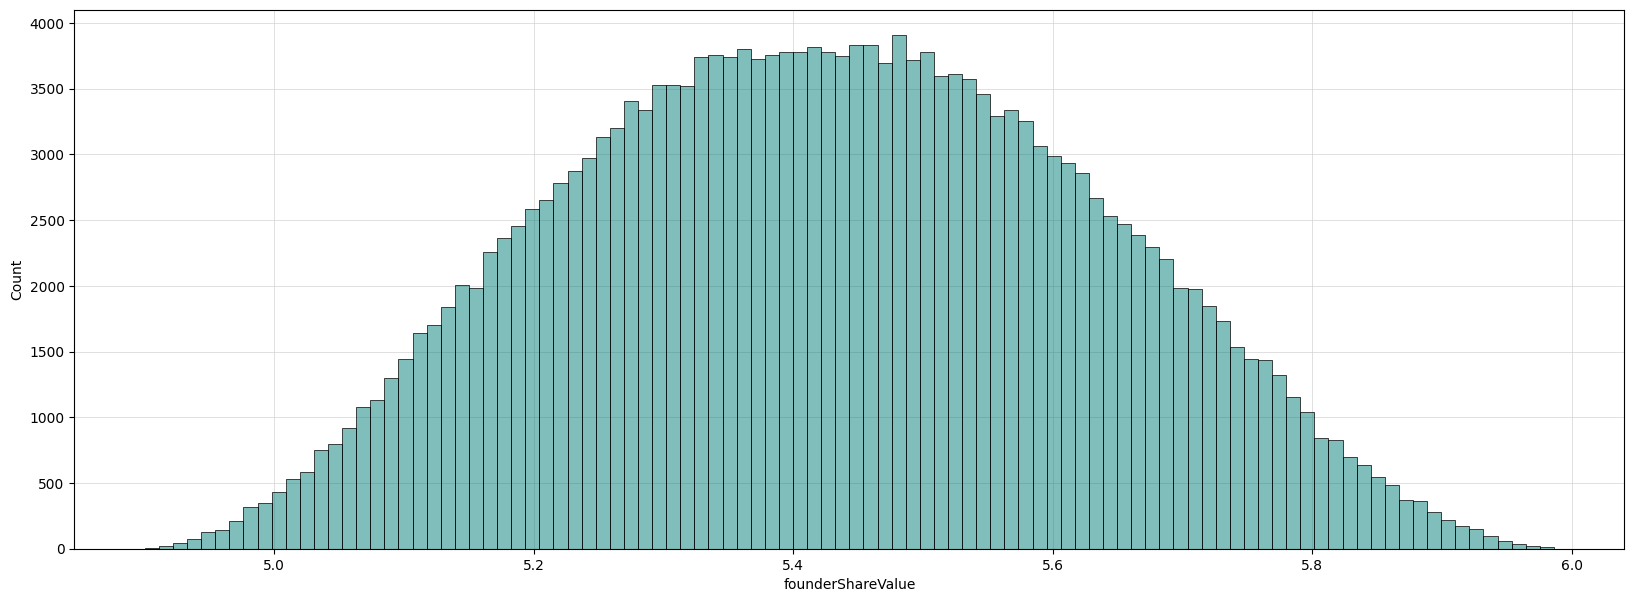

In [7]:
plt.figure(figsize = (20, 7))
sns.histplot(simulationData['founderShareValue'], bins = 100, color = "#007E76", alpha = 0.5, zorder = 2, linewidth = 0.5)
plt.grid(color = "lightgray", linewidth = 0.5)
plt.show()

In [8]:
print("Some stats for Founder Share Value:\n")
print(f"Mean: {simulationData['founderShareValue'].mean():.6f}")
print(f"Median: {simulationData['founderShareValue'].median():.6f}")
print(f"Standard Deviation: {simulationData['founderShareValue'].std():.6f}")
print(f"95% Confidence Interval: [{simulationData['founderShareValue'].quantile(0.025):.6f}, {simulationData['founderShareValue'].quantile(0.975):.6f}]")
print(f"99% Confidence Interval: [{simulationData['founderShareValue'].quantile(0.005):.6f}, {simulationData['founderShareValue'].quantile(0.995):.6f}]")

Some stats for Founder Share Value:

Mean: 5.429775
Median: 5.427488
Standard Deviation: 0.200645
95% Confidence Interval: [5.059596, 5.811888]
99% Confidence Interval: [4.989204, 5.890088]
